In [17]:
import osmnx as ox
import momepy
import geopandas as gpd

In [18]:
local_crs = 3414

place = "Singapore"

latlng = (1.29, 103.85)
dist = 30000

study_area = gpd.read_file("./source/Singapore_studyArea.shp").to_crs(epsg=4326)

# assuming your geodataframe is called `gdf` and the geometry column is called `geometry`
study_area_polygon = study_area.geometry.unary_union

<Axes: >

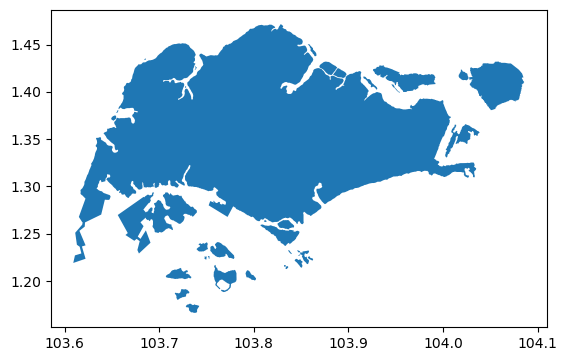

In [19]:
study_area.plot()

In [20]:
# buildings = ox.geometries.geometries_from_place(place, tags={'building':True})
# buildings = ox.geometries.geometries_from_point(latlng, tags={'building':True}, dist=dist)
buildings = ox.geometries.geometries_from_polygon(study_area_polygon, tags={'building':True})
buildings.head()

amenity                   geometry addr:street   
element_type osmid                                                      
node         518475196     NaN  POINT (103.81225 1.30876)         NaN  \
             965698989     NaN  POINT (103.82913 1.29577)         NaN   
             965700669     NaN  POINT (103.82906 1.29618)         NaN   
             965700671     NaN  POINT (103.82825 1.29639)         NaN   
             965700673     NaN  POINT (103.83048 1.29633)         NaN   

                       entrance alt_name bench  bin  bus highway location   
element_type osmid                                                          
node         518475196      NaN      NaN   NaN  NaN  NaN     NaN      NaN  \
             965698989      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700669      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700671      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700673      NaN      NaN   NaN  NaN  NaN     NaN      NaN   

                        ... cooling:method ways building:1992-2017   
element_type osmid      ...                                          
node         518475196  ...            NaN  NaN                NaN  \
             965698989  ...            NaN  NaN                NaN   
             965700669  ...            NaN  NaN                NaN   
             965700671  ...            NaN  NaN                NaN   
             965700673  ...            NaN  NaN                NaN   

                       name:1992-2017 name:vi garden:type   
element_type osmid                                          
node         518475196            NaN     NaN         NaN  \
             965698989            NaN     NaN         NaN   
             965700669            NaN     NaN         NaN   
             965700671            NaN     NaN         NaN   
             965700673            NaN     NaN         NaN   

                       parking:condition:both parking:lane:both end_date   
element_type osmid                                                         
node         518475196                    NaN               NaN      NaN  \
             965698989                    NaN               NaN      NaN   
             965700669                    NaN               NaN      NaN   
             965700671                    NaN               NaN      NaN   
             965700673                    NaN               NaN      NaN   

                       roof:level  
element_type osmid                 
node         518475196        NaN  
             965698989        NaN  
             965700669        NaN  
             965700671        NaN  
             965700673        NaN  

[5 rows x 422 columns]

In [21]:
buildings.head()

buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)
buildings = buildings[["geometry"]].to_crs(local_crs)
print(buildings.geom_type.value_counts())


Polygon    112718
Name: count, dtype: int64


In [22]:
print(buildings.geom_type.value_counts())
buildings.head()

Polygon    112718
Name: count, dtype: int64


,geometry
0,"POLYGON ((18617.869 36738.578, 18629.743 36729..."
1,"POLYGON ((13728.615 35618.333, 13736.938 35595..."
2,"POLYGON ((34094.370 39221.964, 34088.449 39229..."
3,"POLYGON ((45916.033 38548.540, 45911.592 38554..."
4,"POLYGON ((30198.721 31654.180, 30193.001 31658..."


In [23]:
osm_graph= ox.graph.graph_from_polygon(study_area_polygon, network_type='drive')
osm_graph = ox.projection.project_graph(osm_graph, to_crs=local_crs)
streets = ox.graph_to_gdfs(
    osm_graph,
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True
)

streets.head()
type(streets)

streets = streets.drop(columns=[col for col in streets.columns if col != 'geometry'])

In [24]:
enclosures = momepy.enclosures(streets, limit= study_area.to_crs(local_crs))

<Axes: >

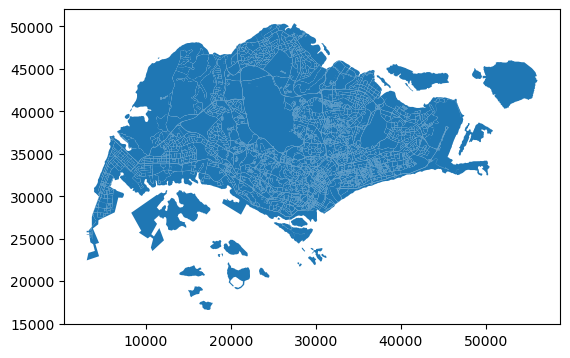

In [25]:
enclosures.plot()

In [27]:
overlapping_polygons.head()

,eID_left,geometry,index_right,eID_right
0,0,"POLYGON ((44186.853 35217.240, 44144.233 35156...",4011,4011
3,3,"POLYGON ((43545.709 34277.204, 43541.358 34271...",4011,4011
5,5,"POLYGON ((43541.358 34271.111, 43492.918 34203...",4011,4011
4011,4011,"POLYGON ((43454.639 34315.003, 43495.317 34298...",4011,4011
4012,4012,"POLYGON ((43520.754 34287.529, 43495.317 34298...",4011,4011


In [40]:
# Perform a spatial join of the overlapping polygons with themselves
spatial_join = gpd.sjoin(enclosures, enclosures, how="inner", op="intersects")

# Count the number of overlapping polygons for each polygon
overlapping_counts = spatial_join.groupby(["eID_left"]).size()

# Get the polygons that overlap with more than one other polygon
overlapping_count = overlapping_counts[overlapping_counts > 30].index.tolist()


c:\ProgramData\anaconda3\envs\working\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


[1, 22, 68, 192, 346, 361, 375, 412, 425, 453, 508, 544, 573, 748, 755, 767, 769, 785, 795, 822, 854, 880, 966, 1046, 1057, 1109, 1113, 1146, 1169, 1211, 1248, 1260, 1308, 1529, 1624, 1749, 1752, 2089, 2191, 2256, 2775, 2851, 2912, 3121, 3180, 3310, 3963, 4309, 4710, 5294, 5432, 5633, 6390, 7213, 7708, 7817, 8623, 8905, 8942, 9263, 9687]


<Axes: >

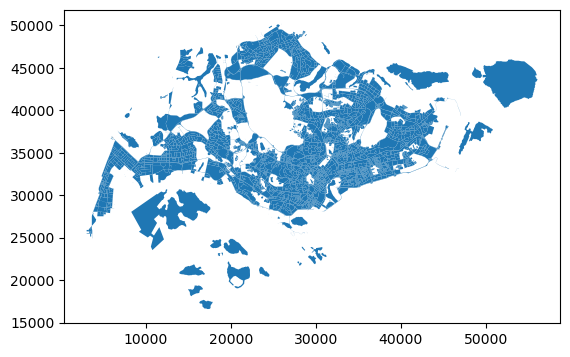

In [46]:
x = enclosures[enclosures['eID'].isin(overlapping_counts.index[overlapping_counts < 30])]

x.plot()